In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP1000
n=1000

#Fitxer que contè en CV els gens codifcants de PROTEÏNES més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensCV_noversio_PROTEIN_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000160882,ENSG00000259384,ENSG00000172023,ENSG00000172179,ENSG00000169248,ENSG00000159723,ENSG00000115386,ENSG00000174576,ENSG00000170498,...,ENSG00000175785,ENSG00000108370,ENSG00000160255,ENSG00000133116,ENSG00000179698,ENSG00000135407,ENSG00000136541,ENSG00000204323,ENSG00000110786,ENSG00000180332
0,Brain - Cortex,0.35630,0.0000,0.00000,0.00000,0.03501,0.30600,0.1653,1.57600,0.2355,...,13.080,2.649,3.6590,0.37650,7.700,3.667,203.500,3.9580,61.850,13.2900
1,Brain - Cerebellum,0.43660,0.2089,0.73670,0.00000,0.21980,0.48040,4.3470,7.05500,2.3660,...,9.376,2.894,3.5720,0.18670,30.580,21.020,6.910,0.6713,7.468,0.6185
2,Brain - Cortex,0.18460,4.2000,1.93800,8.21200,0.68150,0.11610,6.2180,1.06300,0.1667,...,2.134,1.948,2.6460,0.31570,1.785,2.839,30.310,0.8131,56.760,6.1490
3,Brain - Cerebellum,0.09784,15.7600,0.12580,9.01800,0.45040,0.28120,0.8642,4.14200,1.9700,...,16.380,3.686,0.8035,0.04249,8.217,22.700,22.900,1.2000,3.029,0.6336
4,Brain - Cortex,0.01387,6.9020,0.06242,11.84000,0.11180,0.34890,0.6267,3.72300,0.4135,...,3.232,2.612,2.8030,0.37430,3.386,1.872,36.690,0.8059,88.370,7.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,0.34510,0.0000,1.62900,0.00000,28.63000,0.50800,3.6430,0.37170,0.1369,...,3.947,1.181,1.5930,0.51180,3.871,1.755,32.440,1.1980,80.730,11.7600
2637,Brain - Cerebellum,0.39970,0.7800,1.74600,0.00000,0.00000,0.65050,3.0750,0.36890,2.2940,...,17.770,4.612,1.3310,0.23230,10.420,21.770,17.260,1.6000,3.296,0.9690
2638,Brain - Cortex,0.22160,8.2930,1.51900,11.39000,0.08501,0.58380,5.9720,0.61310,0.1144,...,2.573,3.664,8.4830,0.56940,3.381,3.766,11.950,0.8285,46.320,4.4140
2639,Brain - Cerebellum,0.00000,1.8660,0.00000,0.55470,0.00000,0.42440,0.3344,0.08171,1.4480,...,14.640,5.379,1.2560,0.31000,2.958,18.650,5.142,0.7067,1.534,0.2318


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

73 components expliquen un 95% de la variança. De 1000 dimensions a 73


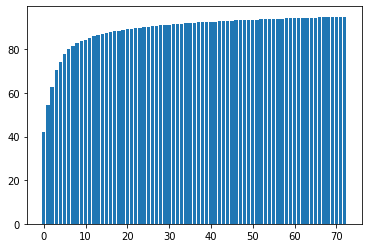

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-9.160342,-7.526479,-0.613067,-9.100854,-0.760861,-3.791271,4.460470,4.174256,-0.458011,6.581054,...,0.314217,1.071072,-0.900426,1.142684,-1.057465,-1.094664,-0.763543,-0.838104,1.270422,0.424935
1,63.762282,-1.527453,-4.304147,2.262281,1.414901,-1.180219,0.466225,0.072536,-1.627032,1.046817,...,0.163719,0.486129,-0.321235,-0.091438,-0.036819,-0.821231,-0.292640,0.801109,-0.893591,0.301391
2,-17.828559,7.450966,-2.992121,-10.255405,3.076350,19.682008,-4.573615,-9.004998,6.176389,5.877219,...,-1.411679,-1.194400,-2.654457,-0.524927,1.450960,-1.067937,-1.460301,1.046252,0.424947,1.897397
3,-19.712574,-13.124631,-27.369658,-9.854618,4.397675,-5.417304,-1.285401,-0.609272,1.066351,-3.202733,...,-1.631916,-0.323888,0.900872,0.463098,-0.468571,0.524171,1.166787,-0.807050,-0.928491,-0.818658
4,-12.763472,-15.363262,-11.793543,-11.540161,-0.349682,0.368572,0.948881,0.494363,-3.833824,-3.543376,...,-0.422958,-0.497908,0.567383,-0.591556,0.097984,1.215113,0.732669,-0.533408,-0.973886,0.140063


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,SMTSD
0,-9.160342,-7.526479,-0.613067,-9.100854,-0.760861,-3.791271,4.460470,4.174256,-0.458011,6.581054,...,1.071072,-0.900426,1.142684,-1.057465,-1.094664,-0.763543,-0.838104,1.270422,0.424935,Brain - Hippocampus
1,63.762282,-1.527453,-4.304147,2.262281,1.414901,-1.180219,0.466225,0.072536,-1.627032,1.046817,...,0.486129,-0.321235,-0.091438,-0.036819,-0.821231,-0.292640,0.801109,-0.893591,0.301391,Brain - Cerebellum
2,-17.828559,7.450966,-2.992121,-10.255405,3.076350,19.682008,-4.573615,-9.004998,6.176389,5.877219,...,-1.194400,-2.654457,-0.524927,1.450960,-1.067937,-1.460301,1.046252,0.424947,1.897397,Brain - Frontal Cortex (BA9)
3,-19.712574,-13.124631,-27.369658,-9.854618,4.397675,-5.417304,-1.285401,-0.609272,1.066351,-3.202733,...,-0.323888,0.900872,0.463098,-0.468571,0.524171,1.166787,-0.807050,-0.928491,-0.818658,Brain - Nucleus accumbens (basal ganglia)
4,-12.763472,-15.363262,-11.793543,-11.540161,-0.349682,0.368572,0.948881,0.494363,-3.833824,-3.543376,...,-0.497908,0.567383,-0.591556,0.097984,1.215113,0.732669,-0.533408,-0.973886,0.140063,Brain - Frontal Cortex (BA9)


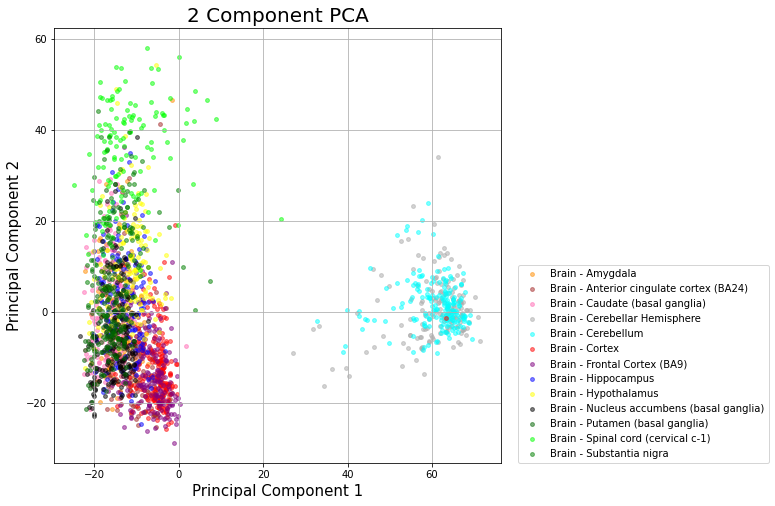

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

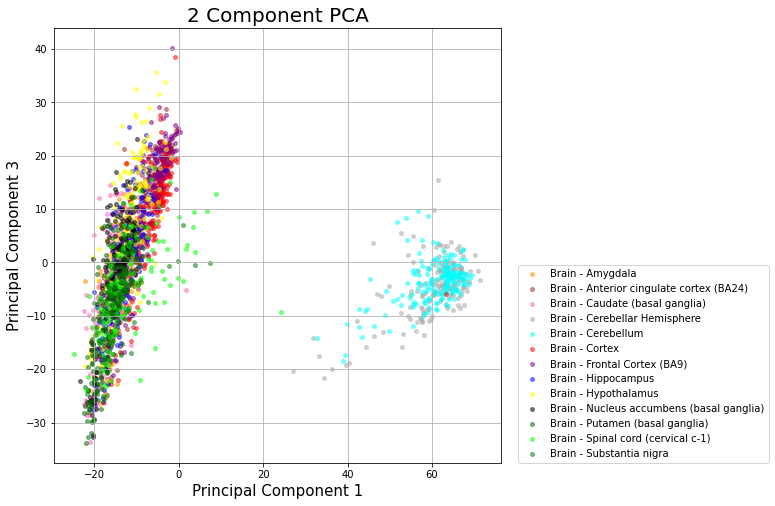

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.002s...
[t-SNE] Computed neighbors for 2112 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 6.963067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.049278
[t-SNE] KL divergence after 1000 iterations: 1.047551


,X,Y,Tipus Teixit
0,-13.574177,-11.323883,Brain - Hippocampus
1,62.137794,2.552902,Brain - Cerebellum
2,-18.318428,-0.986221,Brain - Frontal Cortex (BA9)
3,-19.550537,24.507977,Brain - Nucleus accumbens (basal ganglia)
4,-29.974707,6.182216,Brain - Frontal Cortex (BA9)


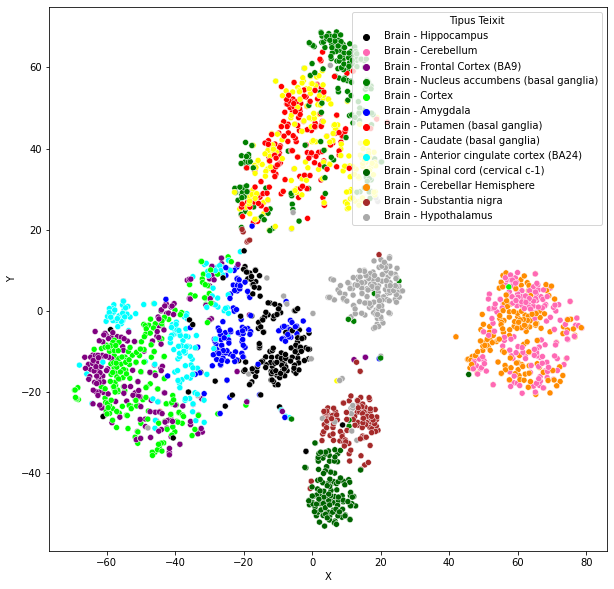

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
38 # Prec. mitjana:  79.12188142716624  desv.:  3.0024647460204426  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
37 # Prec. mitjana:  79.21666815702405  desv.:  2.4863024463766825  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
39 # Prec. mitjana:  78.7425109541268  desv.:  2.845419700108924  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
40 # Prec. mitjana:  78.74228740051863  desv.:  2.4035254705242926  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
36 # Prec. mitjana:  79.26361441473667  desv.:  3.880983457571321  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
33 # Prec. mitjana:  79.87883394437986  desv.:  3.229775804438479  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
35 # Prec. mitjana:  79.452740767236  desv.:  3.591406185967632  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
32 # Prec. mitjana:  80.06863095770368  desv.:  3.7917604948274257  paràmetres:  {'n_ne

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,30,1,0,0,0,0,0,2,0,0,1,0,0
Brain - Anterior cingulate cortex (BA24),0,20,0,0,0,4,4,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,37,0,0,0,1,0,0,1,13,0,0
Brain - Cerebellar Hemisphere,0,0,0,40,11,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,5,50,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,0,40,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),2,1,0,0,0,7,23,0,0,0,0,0,0
Brain - Hippocampus,3,3,1,0,0,0,1,30,0,0,0,1,2
Brain - Hypothalamus,0,0,0,1,0,0,0,1,34,1,0,0,2


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
54 # Prec. mitjana:  18.371411964589107  desv.:  0.4698482615797671  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
51 # Prec. mitjana:  28.362246266654743  desv.:  1.6138155206010407  paràmetres:  {'C': 0.01, 'gamma': 0.001}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
56 # Prec. mitjana:  10.038004113386389  desv.:  0.19

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,33,0,0,0,0,0,0,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,27,0,0,0,0,1,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,48,0,0,0,0,0,0,1,2,0,0
Brain - Cerebellar Hemisphere,0,0,0,49,2,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,0,55,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,41,0,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,0,0,0,0,0,33,0,0,0,0,0,0
Brain - Hippocampus,2,3,0,0,0,0,1,34,0,1,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,36,1,0,0,1


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
132 # Prec. mitjana:  54.73464186711973  desv.:  1.8410364978849723  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
130 # Prec. mitjana:  54.781811678440484  desv.:  1.8460157635744168  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
130 # Prec. mitjana:  54.781811678440484  desv.:  1.8460157635744168  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
129 # Prec. mitjana:  54.82920504336941  desv.:  1.9159952267951463  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
127 # Prec. mitjana:  54.92354466601091  desv.:  1.9542166486392554  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
127 # Prec. mitjana:  54.92354466601091  desv.:  1.9542166486392554  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  44.081194670481985  desv.:  1.8330851153186125  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  27.98354645443978  desv.:  1.787205664588

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,24,1,1,0,0,0,3,2,1,1,1,0,0
Brain - Anterior cingulate cortex (BA24),0,21,0,0,0,2,3,1,0,0,0,0,1
Brain - Caudate (basal ganglia),0,0,37,0,0,0,0,0,0,8,7,0,0
Brain - Cerebellar Hemisphere,0,0,0,41,10,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,11,44,0,0,0,0,0,0,0,0
Brain - Cortex,1,5,0,0,1,30,5,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,3,0,1,0,5,20,0,2,0,0,0,2
Brain - Hippocampus,4,4,0,0,0,1,0,25,2,0,2,0,3
Brain - Hypothalamus,0,0,1,1,0,0,1,1,29,1,1,1,3


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
65 # Prec. mitjana:  80.1638647947778  desv.:  3.5924137564954632  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
55 # Prec. mitjana:  83.99669140659931  desv.:  2.277107703166716  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
53 # Prec. mitjana:  85.55821335956362  desv.:  2.1144305934852006  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
52 # Prec. mitjana:  85.70084056156666  desv.:  2.2098633296387944  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
49 # Prec. mitjana:  86.74215326835375  desv.:  2.2937801275674516  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
50 # Prec. mitjana:  86.59997317356701  desv.:  2.1323031240898347  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
66 # Prec. mitjana:  79.92421532683538  desv.:  3.063440186284321  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
54 # Prec. mitjana:  85.03778055977824  desv.:  2.3997012062744827  paràmetres:  {'max_depth': 7, 'n_estimator

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,34,0,0,0,0,0,0,0,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,27,0,0,0,0,1,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,47,0,0,0,0,1,0,1,3,0,0
Brain - Cerebellar Hemisphere,0,0,0,45,6,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,5,50,0,0,0,0,0,0,0,0
Brain - Cortex,0,0,0,0,1,40,1,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,0,0,0,0,4,27,0,1,0,0,1,0
Brain - Hippocampus,0,3,1,0,0,0,3,34,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,1,35,1,0,0,1


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 82.24%
Model kNN, Accuracy de test és: 83.74%
##################################################
Model Svm Accuracy: 93.75%
Model Svm, Accuracy de test és: 95.09%
##################################################
Model Arbre de Decisió: 73.39%
Model Arbre de Decisió, Accuracy de test és: 75.61%
##################################################
Model Random Forest: 89.44%
Model Random Forest, Accuracy de test és: 91.30%
